<a href="https://colab.research.google.com/github/Sergguker/DZ_Time_1/blob/main/DZ_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [ ]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [ ]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

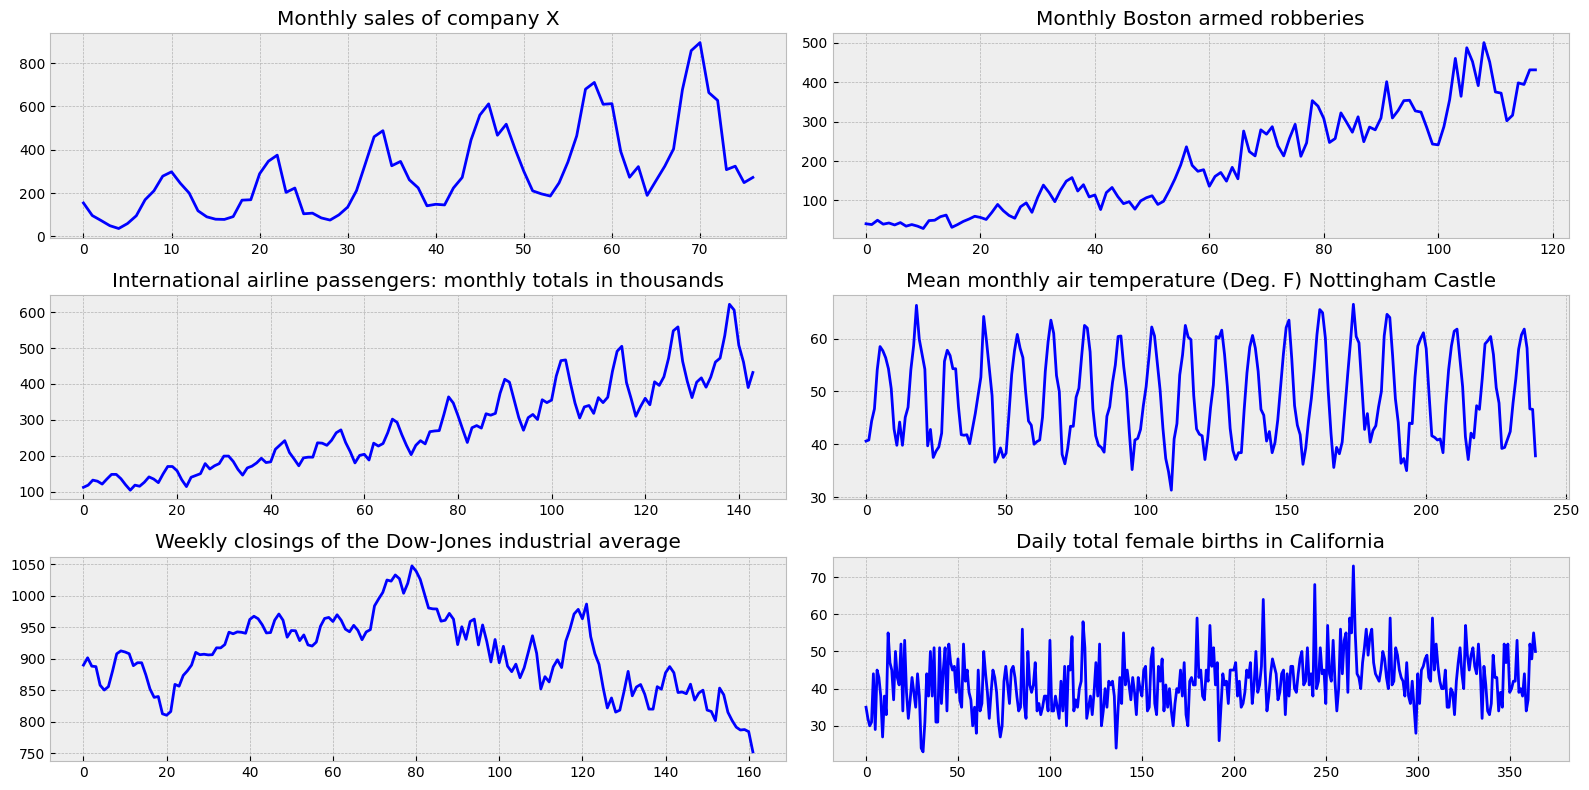

In [ ]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

In [ ]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [ ]:
for key in all_series:
  print(f"\n{key}")
  test_stationarity(all_series[key])


Monthly sales of company X
Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64

Monthly Boston armed robberies
Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64

International airline passengers: monthly totals in thousands
Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Criti

In [ ]:
#Mean monthly air temperature и Daily total female births in California имеют p-value <0.05 . Проверим по графикам автокорреляции

In [ ]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

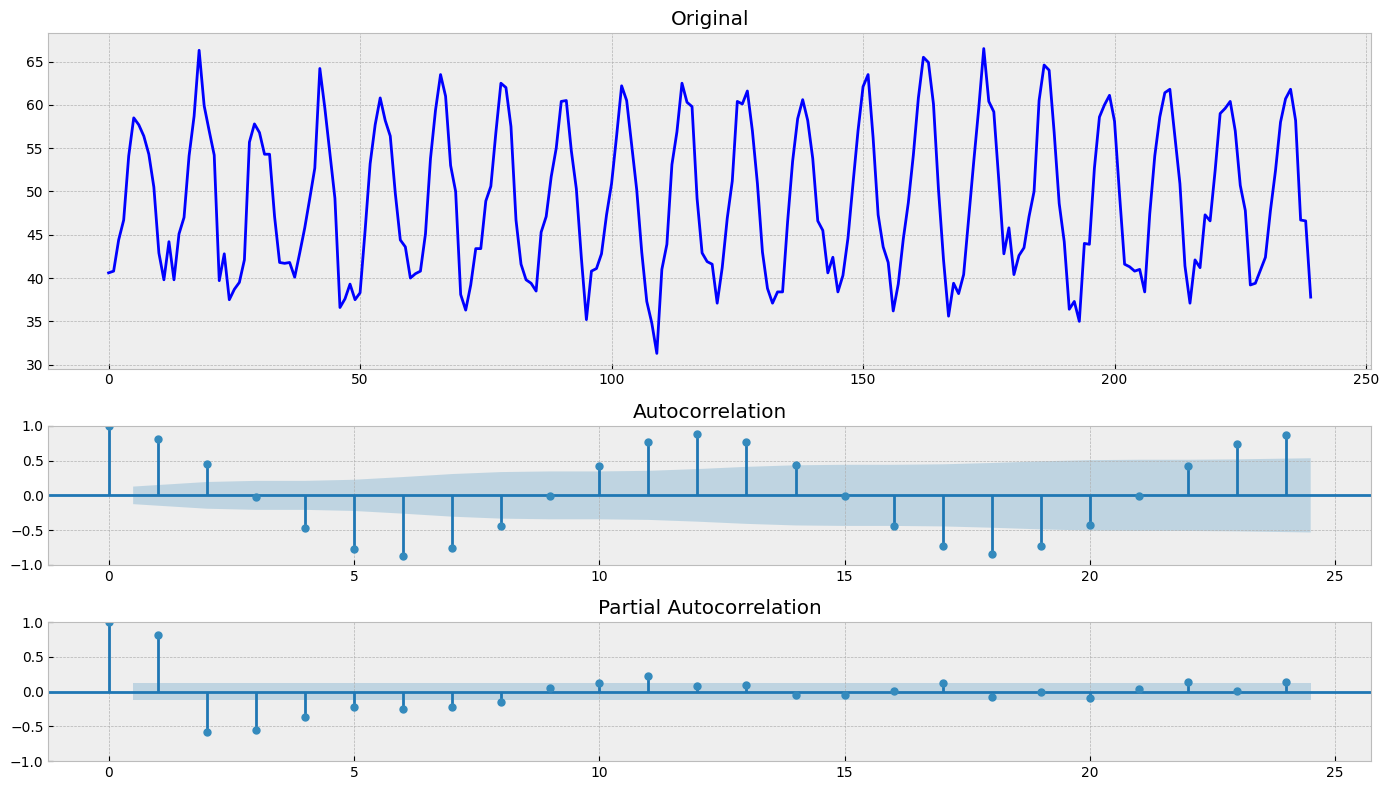

In [ ]:
series = mean_monthly_temp["Deg"]
tsplot(series)

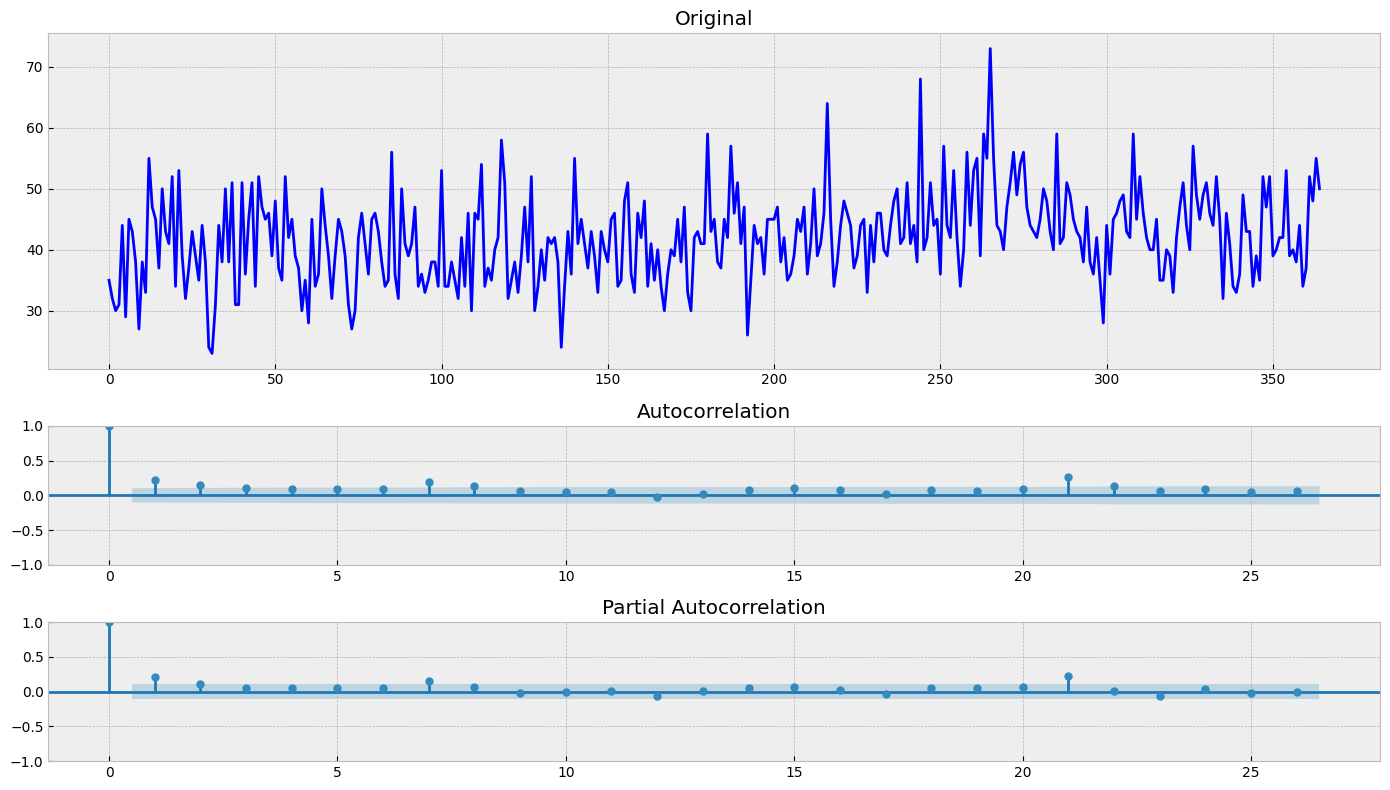

In [ ]:
series = female_births["Count"]
tsplot(series)

In [ ]:
# Daily total female births in California  скорее всего стационарен, а Mean monthly air temperature имеет периодичность, поэтому пока не стационарен.

In [ ]:
# Уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [ ]:
four_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"]
}

In [ ]:
for key in four_series:
  four_series[key] = boxcox(four_series[key], 0)

In [ ]:
for key in four_series:
  print(f"\n{key}")
  test_stationarity(four_series[key])


Monthly sales of company X
Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64

Monthly Boston armed robberies
Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64

International airline passengers: monthly totals in thousands
Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Criti

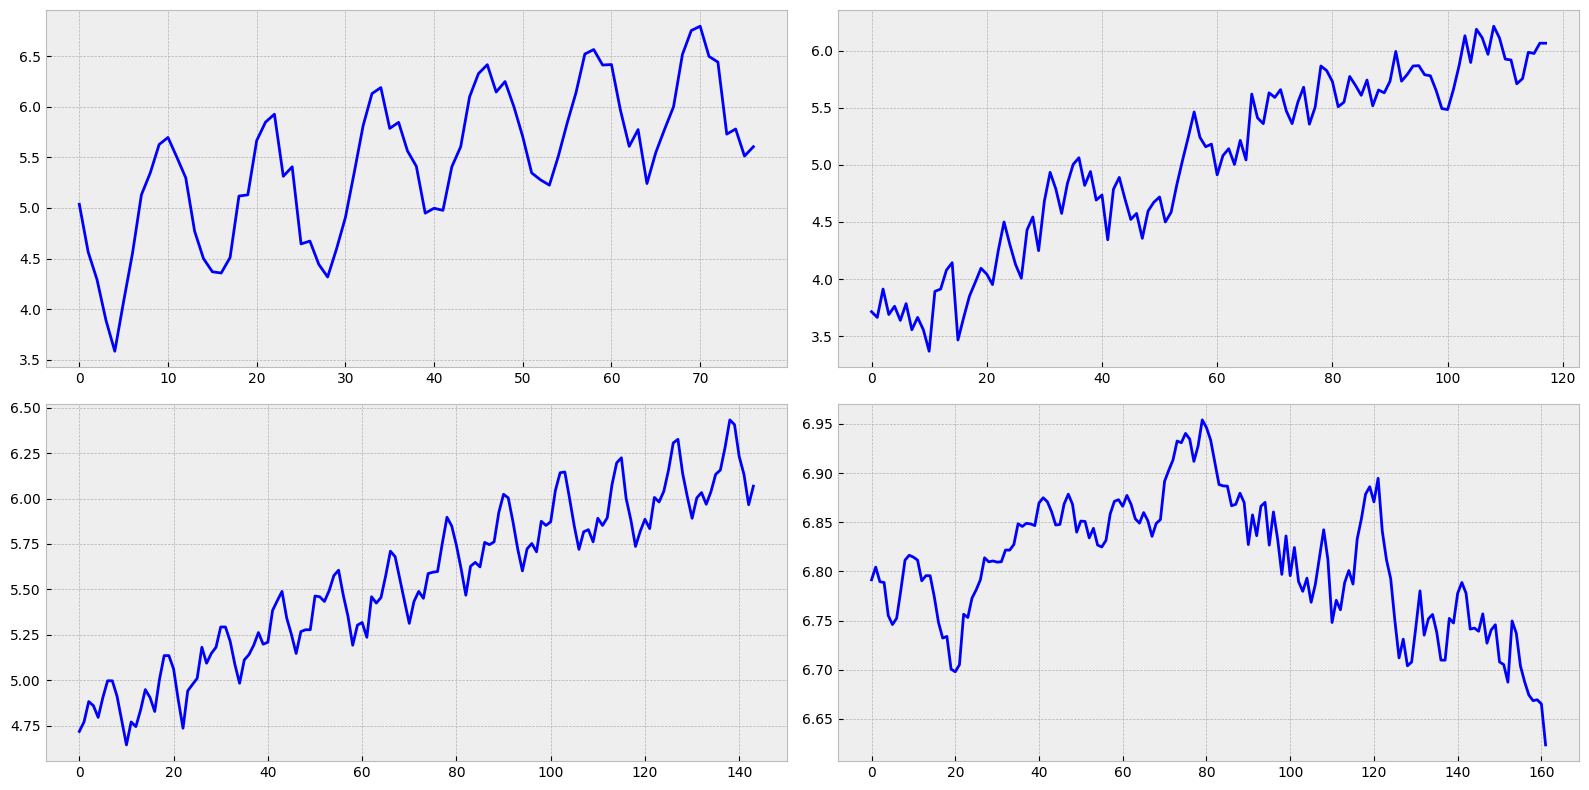

In [ ]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (2, 2)
    for i, key in enumerate(four_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        pd.Series(four_series[key]).plot(ax=ts_ax, color='blue')
        #ts_ax.set_title(key)

    plt.tight_layout()

In [ ]:
# Дифференцируем

In [ ]:
for key in four_series:
  four_series[key] = four_series[key][1:]-four_series[key][:-1]

In [ ]:
for key in four_series:
  print(f"\n{key}")
  test_stationarity(four_series[key])


Monthly sales of company X
Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64

Monthly Boston armed robberies
Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64

International airline passengers: monthly totals in thousands
Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    12

In [ ]:
def tsplot_4(y, lags=None, figsize=(16, 6), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (0, 1))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return


Monthly sales of company X

Monthly Boston armed robberies

International airline passengers: monthly totals in thousands

Weekly closings of the Dow-Jones industrial average


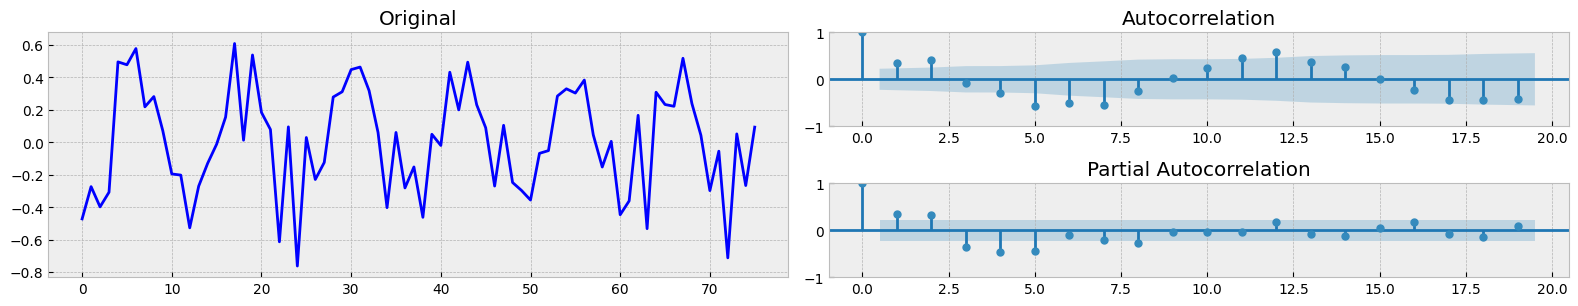

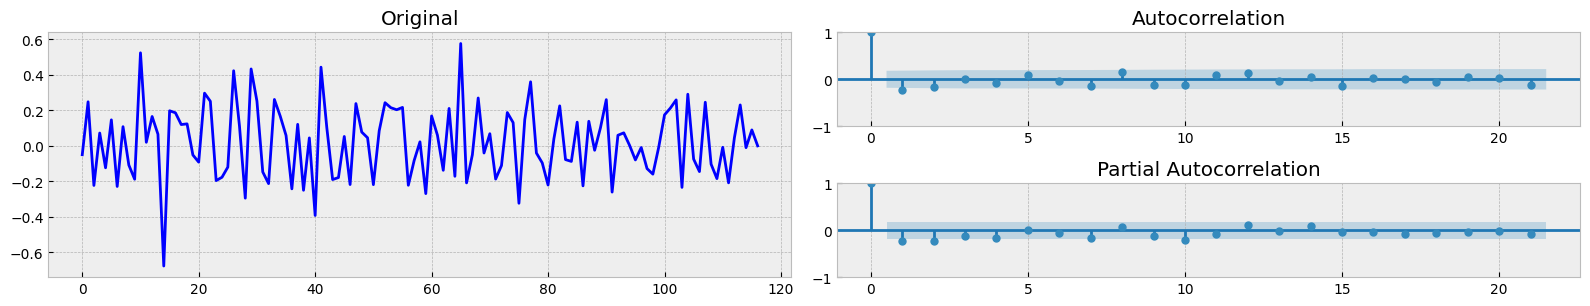

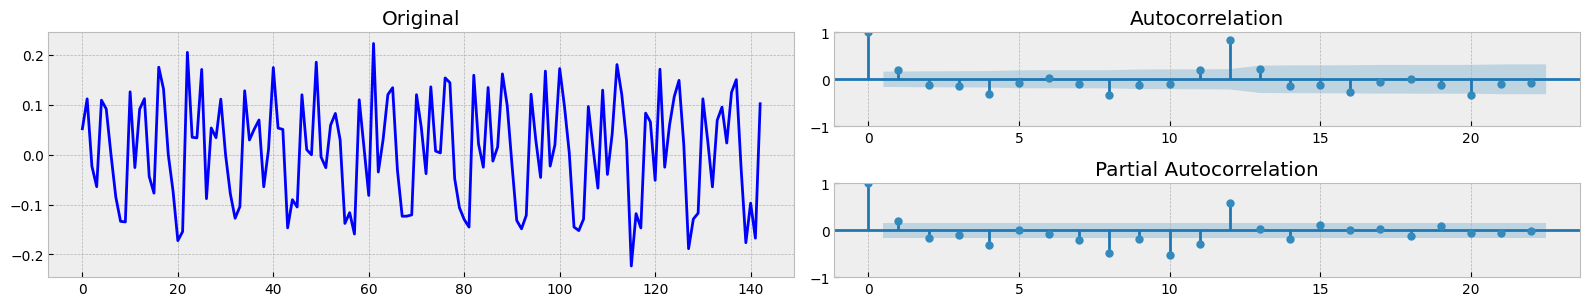

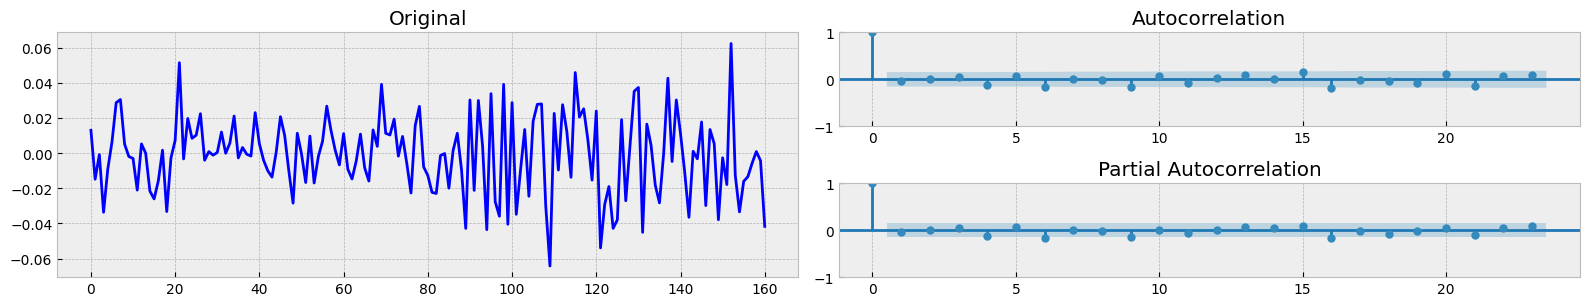

In [ ]:
for key in four_series:
  print(f"\n{key}")
  tsplot_4(four_series[key])

In [ ]:
# По виду графиков и размеру p-value считаю, что  ряды: Monthly Boston armed robberies (p-value = 2.378602e-11) и Weekly closings of the Dow-Jones industrial average (p-value = 2.751609e-24) стационарны, у остальных уберём сезонность.

In [ ]:
rem_list = ["Monthly Boston armed robberies",  "Weekly closings of the Dow-Jones industrial average"]

three_series = {key: four_series[key]
             for key in four_series if key not in rem_list}

#удалим из словаря 2 ряда Monthly Boston armed robberies и Weekly closings of the Dow-Jones industrial average

In [ ]:
three_series["Mean monthly air temperature (Deg. F) Nottingham Castle"] = np.asarray(mean_monthly_temp["Deg"])
#добавим DMean monthly air temperature


Monthly sales of company X

International airline passengers: monthly totals in thousands

Mean monthly air temperature (Deg. F) Nottingham Castle


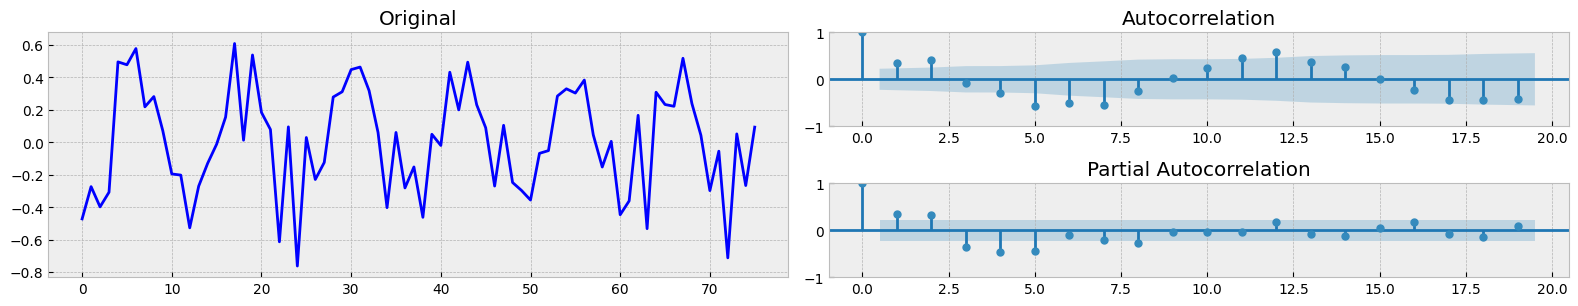

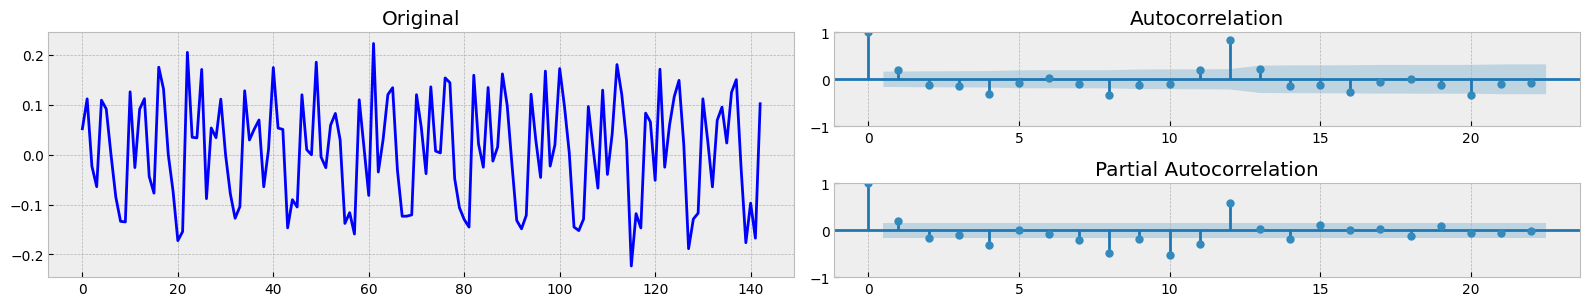

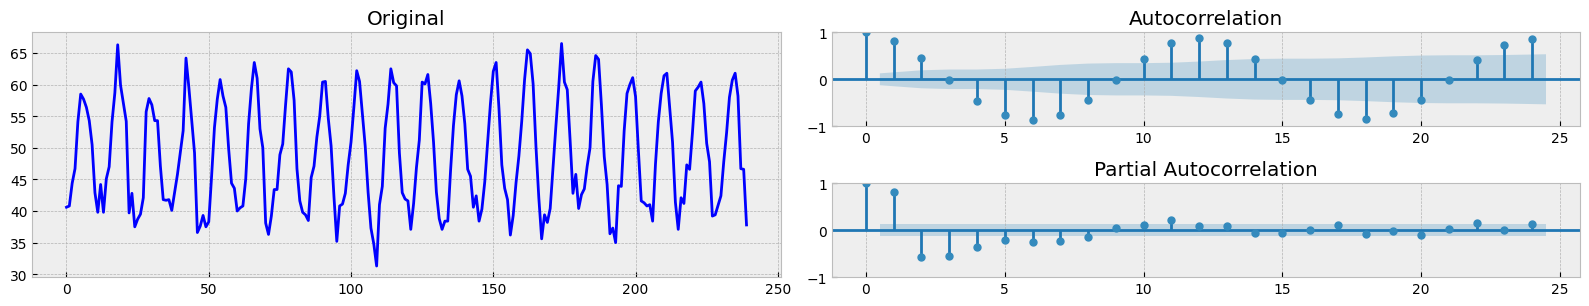

In [ ]:
for key in three_series:
  print(f"\n{key}")
  tsplot_4(three_series[key])

In [ ]:
# уберём периодичность

In [ ]:
for key in three_series:
  three_series[key] = three_series[key][12:]-three_series[key][:-12]

In [ ]:
for key in three_series:
  print(f"\n{key}")
  test_stationarity(three_series[key])


Monthly sales of company X
Results of Dickey-Fuller Test:
Test Statistic                 -2.316045
p-value                         0.166845
#Lags Used                     10.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64

International airline passengers: monthly totals in thousands
Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64

Mean monthly air temperature (Deg. F) Nottingham Castle
Results of Dickey-Fuller Test:
Test Statistic                -6.072501e+00
p-value                        1.141945e-07
#Lags Used                     1.200000e+01
Number of Observ


Monthly sales of company X

International airline passengers: monthly totals in thousands

Mean monthly air temperature (Deg. F) Nottingham Castle


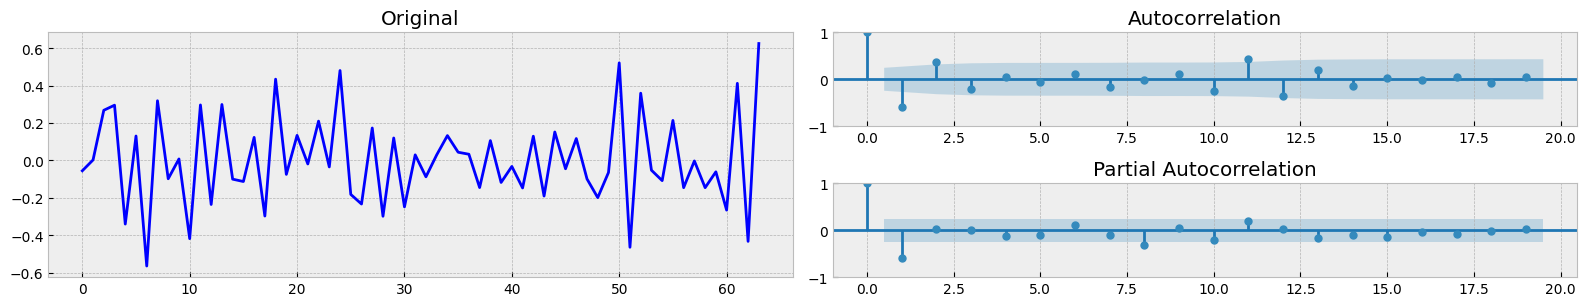

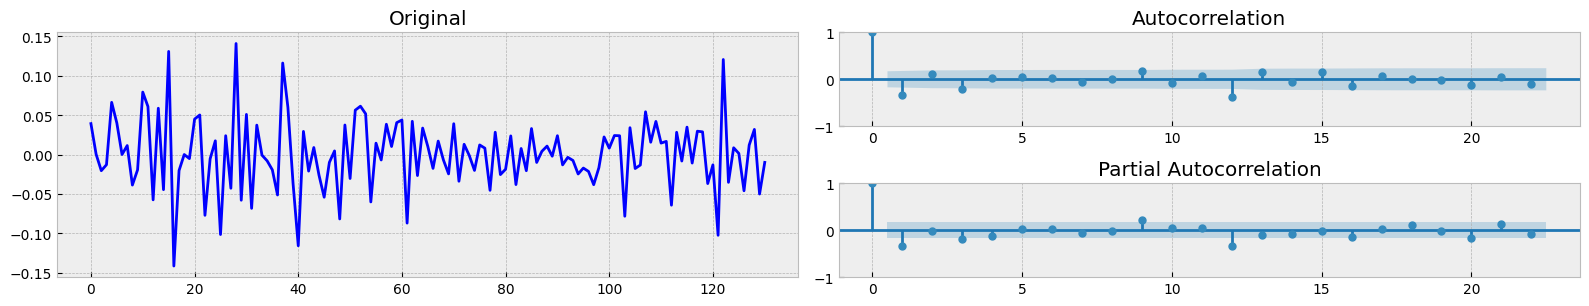

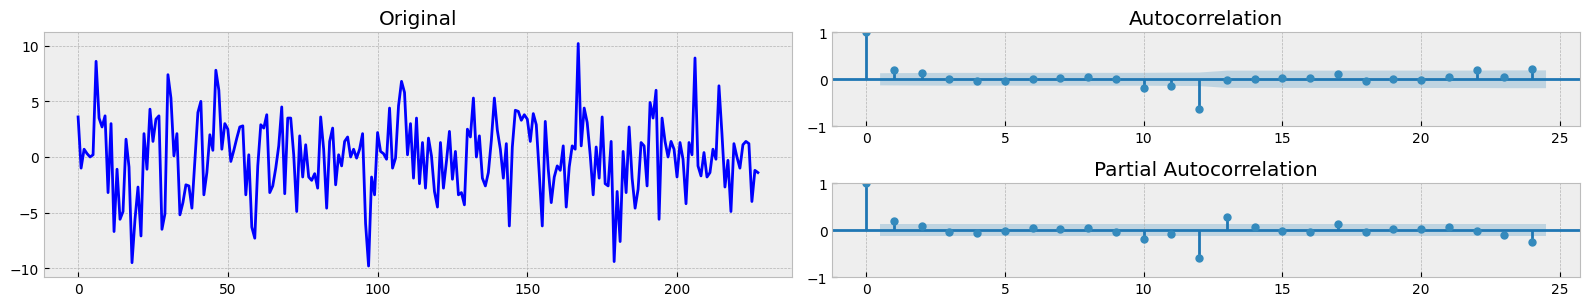

In [ ]:
for key in three_series:
  print(f"\n{key}")
  tsplot_4(three_series[key])